# 라이브러리 불러오기

pandas : 데이터 분석 라이브러리  
numpy : 다양한 계산과 분석 라이브러리  
matplotlib : 시각화 도구 제공  
seaborn : 더 정돈된 시각화 도구

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

# 데이터 불러오기

### titanic 데이터
- PassengerId : id 
- Survived : 생존 여부 (0:사망, 1:생존)
- Pclass : 티켓클래스 (1:1등석, 2:2등석, 3:3등석)
- Name : 승객 이름
- Sex : 성별
- Age : 나이
- Sibsp : 형제 자매 수
- Parch : 부모 자식 수
- Ticket : 티켓 넘버
- Fare : 티켓 요금
- Cabin : 선실
- Embarked : 승선한 항

In [178]:
%pwd

'C:\\Users\\ryu\\2024 비어플 신입세션'

In [3]:
import pandas as pd
data = pd.read_csv('C:/류수민/3-2/비어플/Titanic-Dataset.csv')
# 파일 다운로드 경로를 미리 설정해두면 이름만 써도 됨
data
data.shape

(891, 12)

# EDA
### 목적  
- 간단한 인사이트 얻기
- 전처리를 위한 준비



In [4]:
data.head() #앞에 5개 행 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info() #결측치, 변수 타입, 데이터 차원 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe() #기술통계량 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [275]:
data.isna().sum(axis=0).sort_values() #결측치 개수 오름차순 정렬

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [139]:
data[data.duplicated()] #중복행 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Text(0.5, 1.0, 'correlation heatmap')

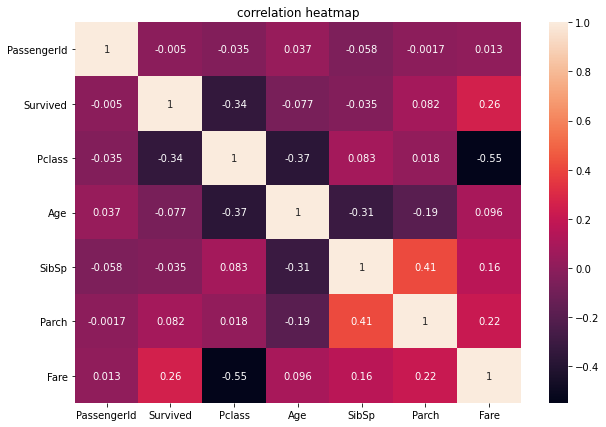

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵

# 종속변수 Survived
- 0 : 사망, 1 : 생존
- 약 5:3의 비율을 가지고 있다

In [277]:
data['Survived'].value_counts() # 종속변수(Survived) 확인 (0:death, 1:survival)

0    549
1    342
Name: Survived, dtype: int64

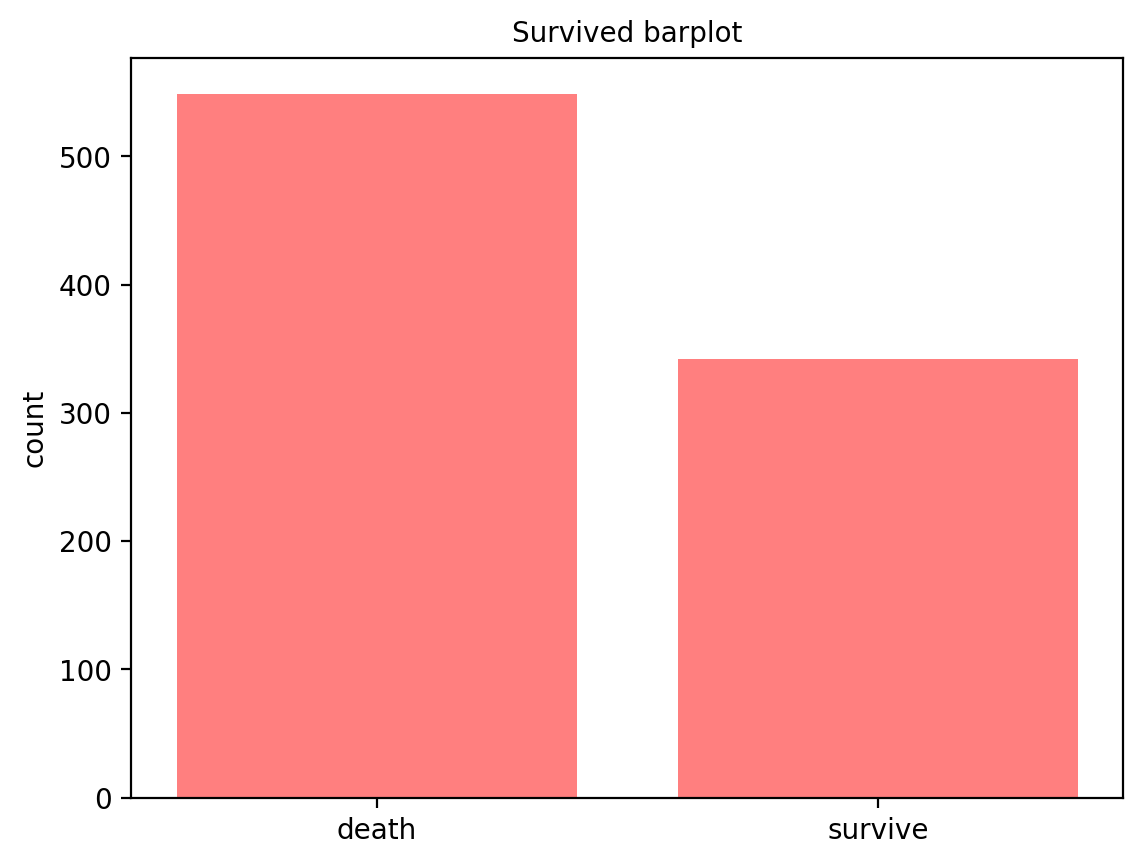

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survived barplot')

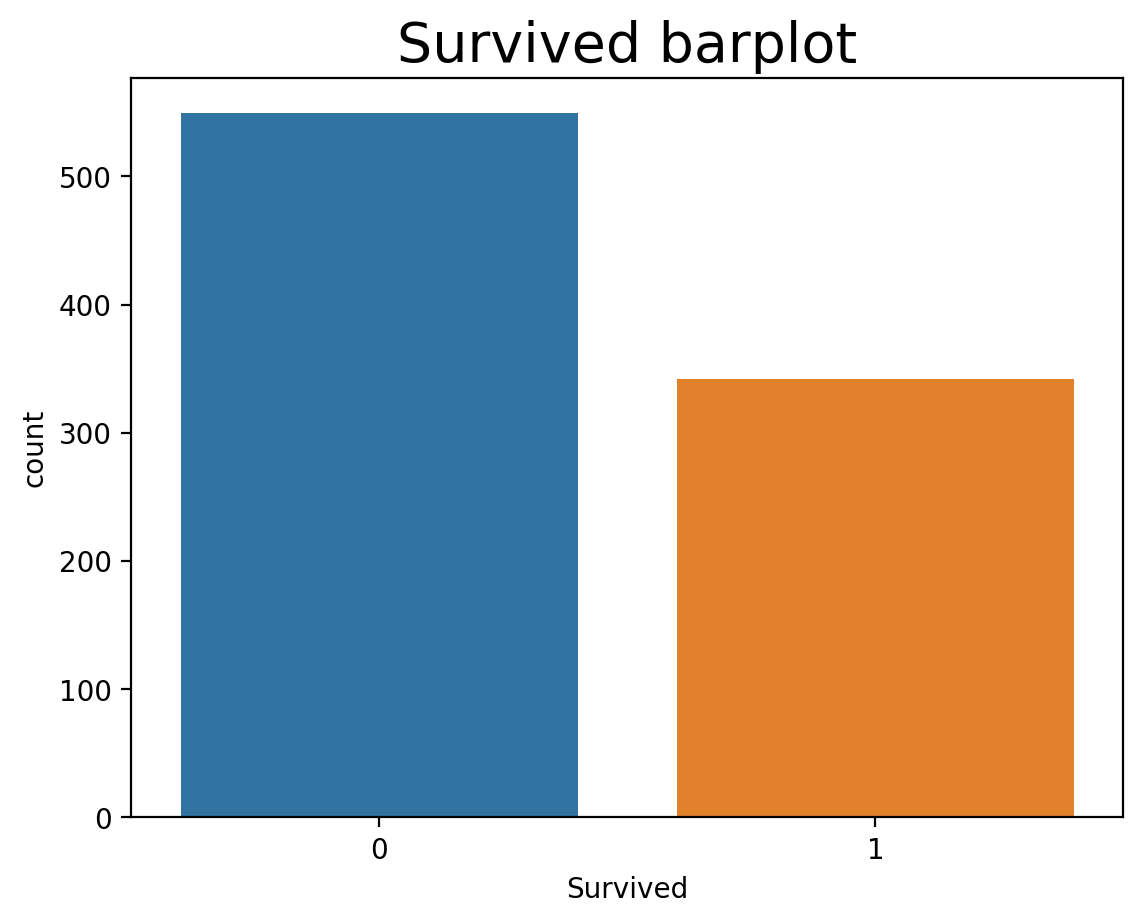

In [282]:
#plt 라이브러리
plt.bar(['death','survive'],data['Survived'].value_counts().values,color='red',alpha=0.5)
plt.title('Survived barplot',fontsize=10)
plt.ylabel('count')
plt.show()
#sns 라이브러리
sns.countplot(data['Survived'])
plt.title('Survived barplot',fontsize=20)

# Pclass(티켓클래스)
- 1,2,3까지 있음(1,2,3등석을 의미)
- 3등급 탑승객이 다른 등급보다 2배 정도 많음
- 티켓클래스가 낮을수록(높은 등급일수록) 생존 확률 증가
- 티켓클래스가 낮을수록 더 비싸짐 (1등석이 3등석보다 비쌈)

3    491
1    216
2    184
Name: Pclass, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


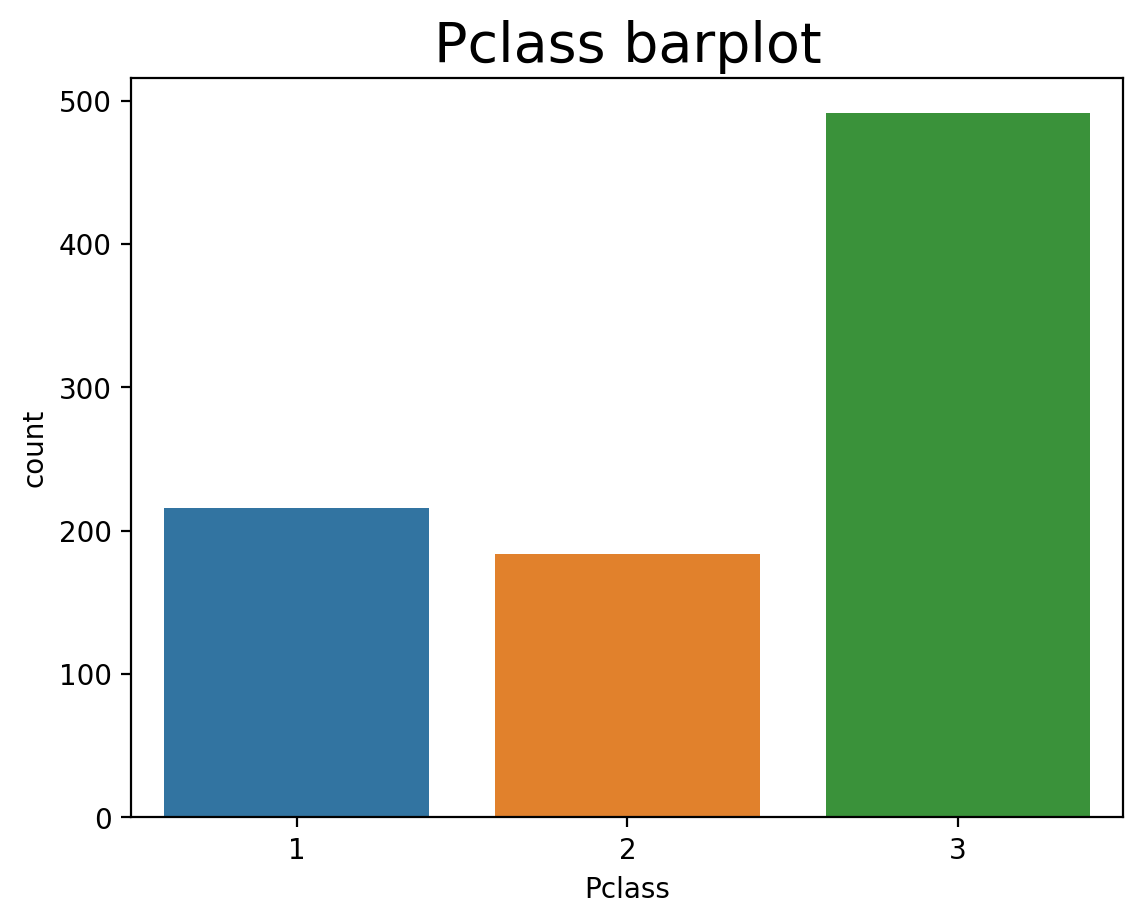

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

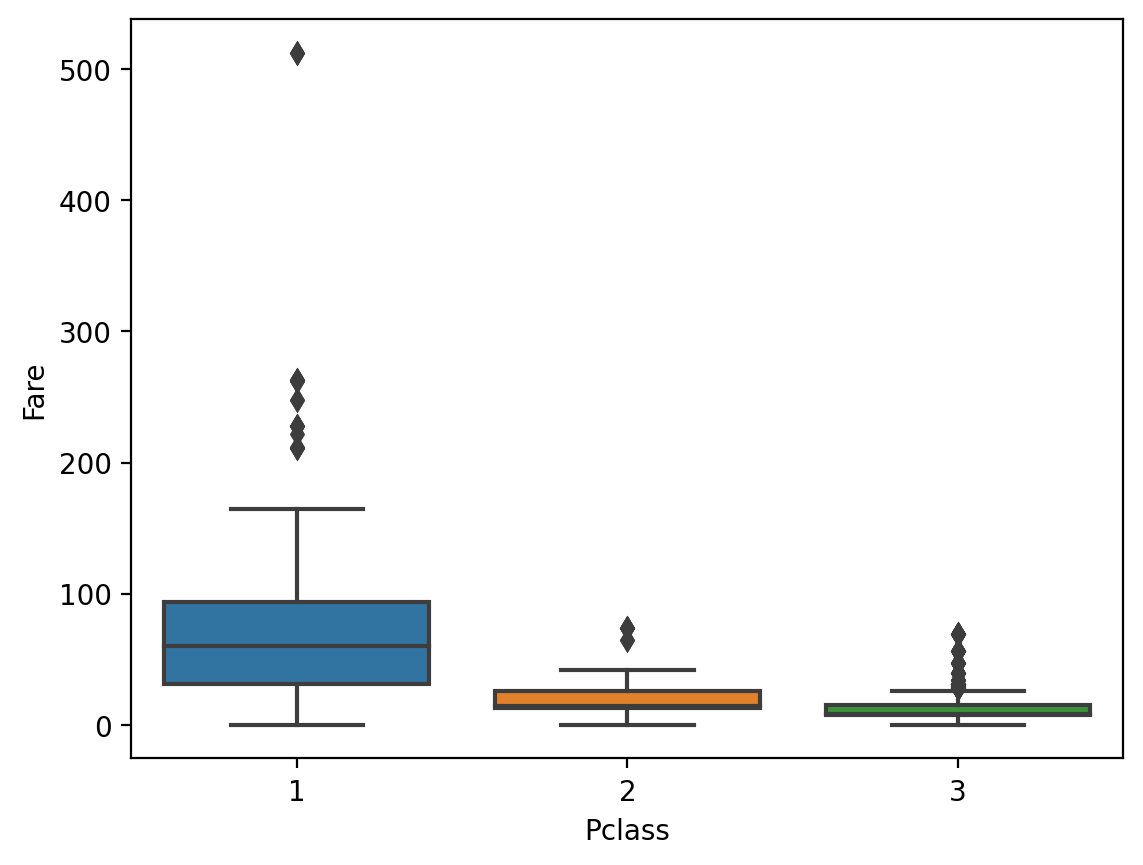

In [215]:
#Pclass
print(data['Pclass'].value_counts())
#시각화
sns.countplot(data['Pclass'])
plt.title('Pclass barplot',fontsize=20)
plt.show()
#생존 여부와 관련이 있는지 살펴보기
print(data[['Pclass','Survived']].value_counts())
print(data.groupby('Pclass').mean()['Survived'])
#Fare과의 관계 살펴보기
sns.boxplot(data.Pclass,data.Fare)

# Name
- 같은 이름이 존재하지 않음
- Mr, Ms, Miss 와 같이 성별을 추론할 수 있는 단서들이 있음

In [48]:
#Name
data['Name'].unique #총 891개의 각기 다른 이름이 있음

<bound method Series.unique of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object>

In [227]:
data[['Name','Sex','Age']] #이름으로 나이의 결측치를 채울 수 있을지 확인해보기

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


# Sex(성별)
- 남자 탑승객이 여자 탑승객보다 많음
- 여자 탑승객이 생존 확률이 약 4배 높음

male      577
female    314
Name: Sex, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


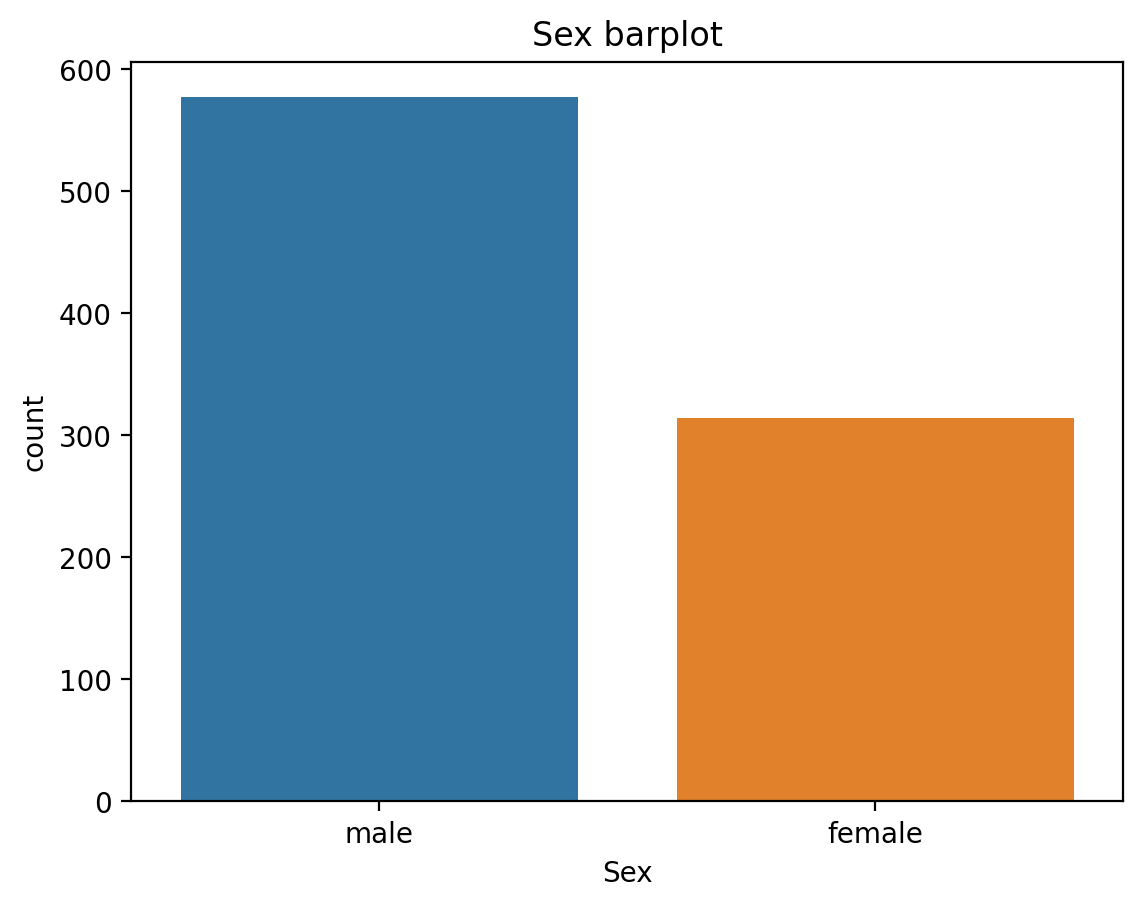

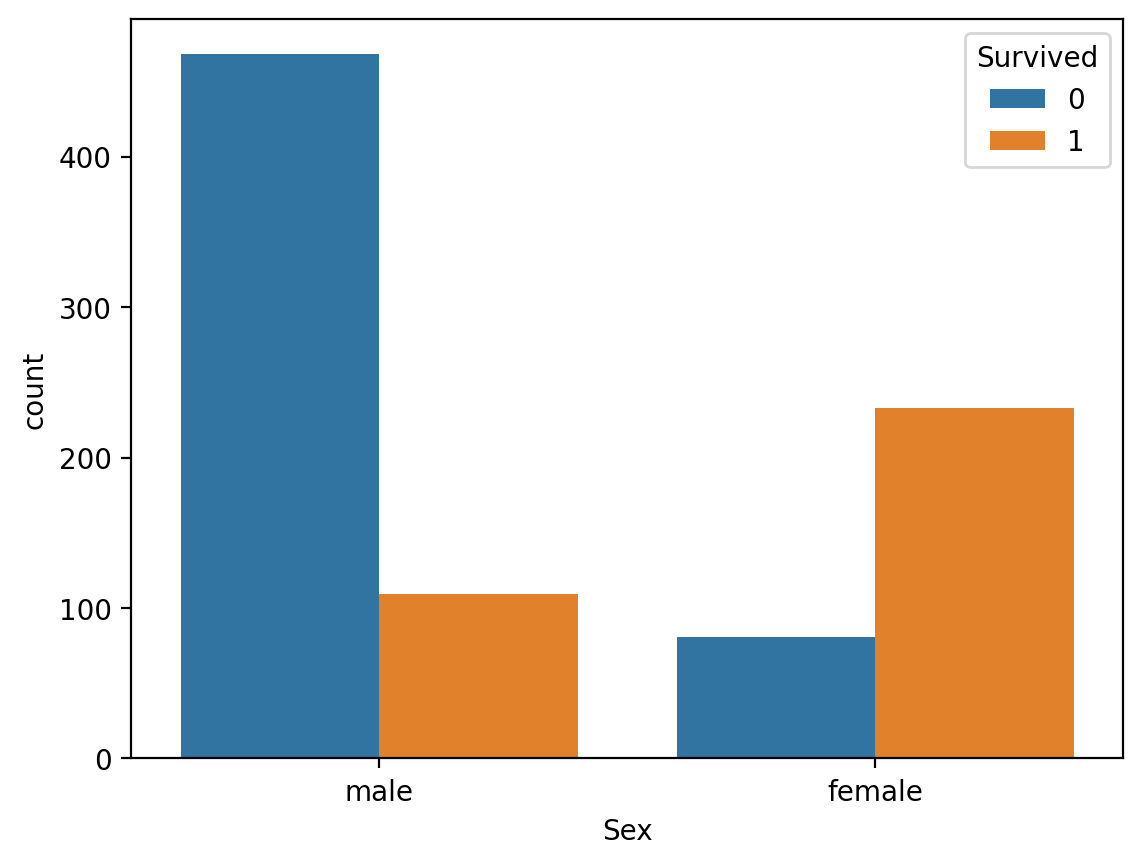

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [218]:
#Sex
print(data['Sex'].value_counts())
sns.countplot(data.Sex)
plt.title('Sex barplot')
plt.show()
#생존 여부와 관련이 있는지 살펴보기
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()
print(data[['Sex','Survived']].value_counts())
print(data.groupby('Sex').mean().Survived)

# Age
- 20대-40대 탑승객이 많음
- 나이에 따른 생존 확률의 평균은 차이가 없어보임 -> 가설검정을 통해 더 자세히 유의성을 살펴볼 수 있다.

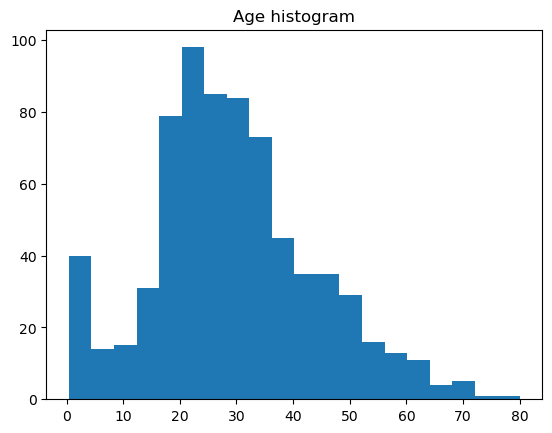

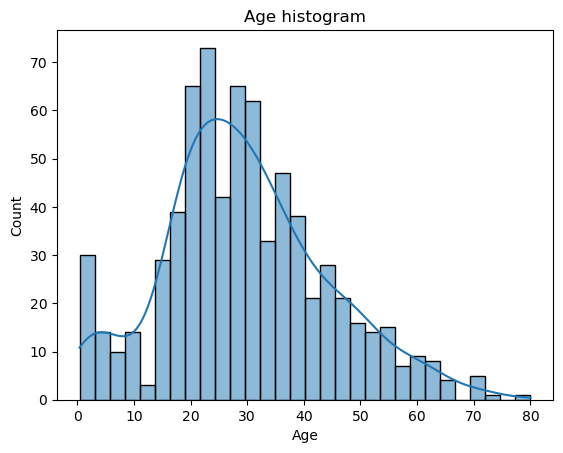

<AxesSubplot:xlabel='Survived', ylabel='Age'>

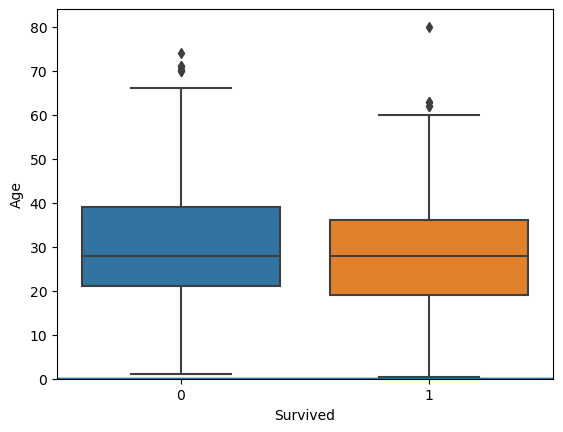

In [161]:
#Age
plt.hist(data.Age,bins=20)
plt.title('Age histogram',fontsize=12)
plt.show()
sns.histplot(data['Age'], bins=30, kde=True) #sns라이브러리
plt.title('Age histogram',fontsize=12)
plt.show()
sns.kdeplot(data.Age) #sns 라이브러리로 밀도함수
#나이와 생존여부 관계 살펴보기
sns.boxplot(x='Survived',y='Age',data=data)

# SibSp(형제자매수), Parch(부모자녀수)
- 둘 다 0이 제일 많음
- 형제 자매, 부모 자녀를 동반하지 않은 승객이 537명
- 형제자매수가 많을수록 나이가 적음
- 부모자식 수가 3 이상이면 나이가 많아짐 -> 많은 자식 수를 가진 부모로 추론 가능, 단 이상행 존재

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


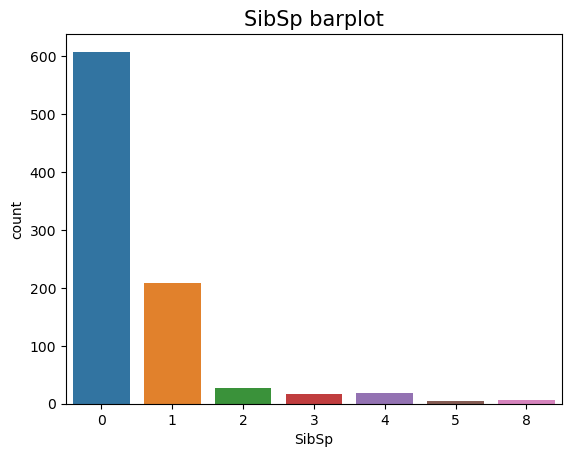

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


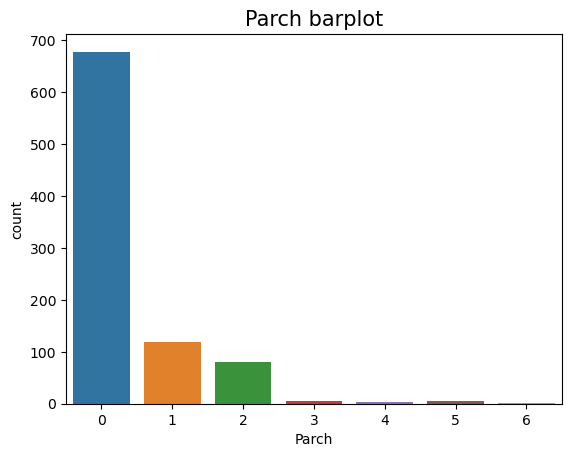

In [172]:
#SibSp, Parch barplot
sns.countplot(data.SibSp)
plt.title("SibSp barplot",fontsize=15)
plt.show()
sns.countplot(data.Parch)
plt.title("Parch barplot",fontsize=15)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


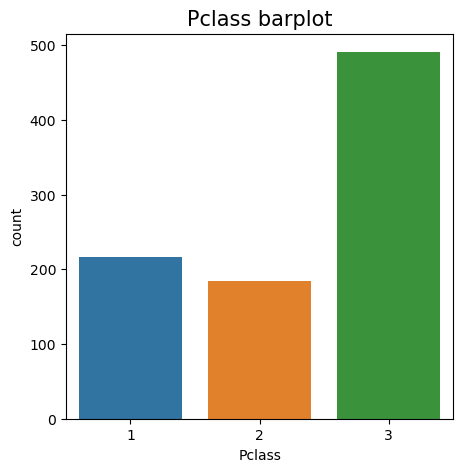

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


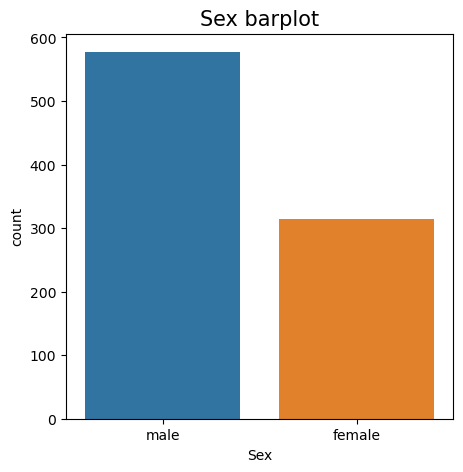

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


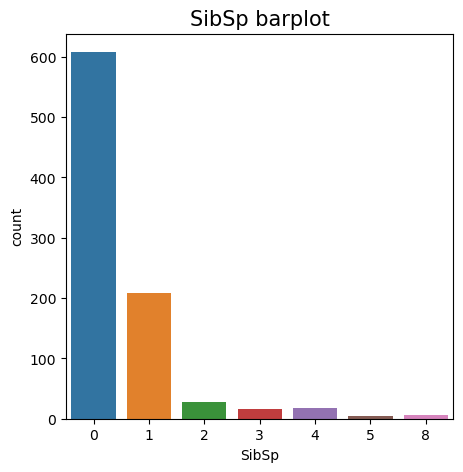

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


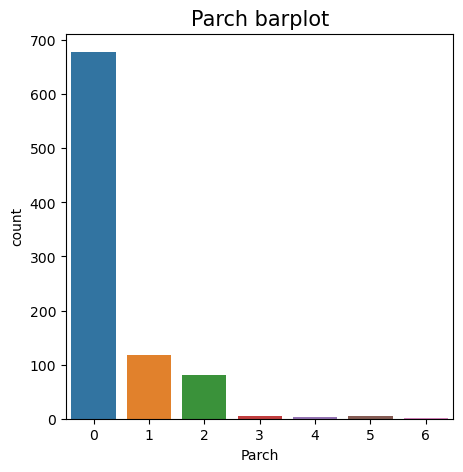

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


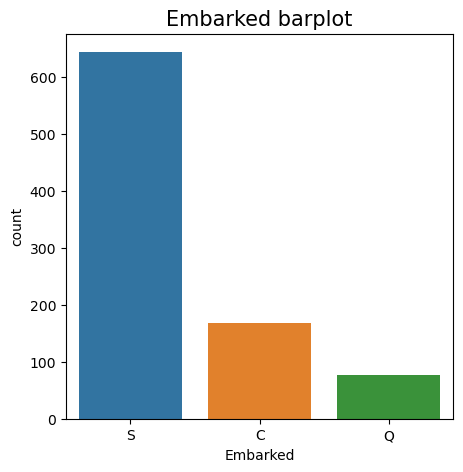

In [173]:
#for문을 사용하여 여러 칼럼의 countplot 그리기
for i in ['Pclass','Sex','SibSp','Parch','Embarked']:
    plt.figure(figsize=(5,5))
    sns.countplot(data[i])
    plt.title(i+' barplot',fontsize=15)
    plt.show()

(array([ 1.,  1., 14., 38., 64., 53., 62., 34., 33., 26., 17., 13., 13.,
        11.,  9.,  6.,  3.,  4.,  1.,  1.]),
 array([ 5.  ,  8.75, 12.5 , 16.25, 20.  , 23.75, 27.5 , 31.25, 35.  ,
        38.75, 42.5 , 46.25, 50.  , 53.75, 57.5 , 61.25, 65.  , 68.75,
        72.5 , 76.25, 80.  ]),
 <BarContainer object of 20 artists>)

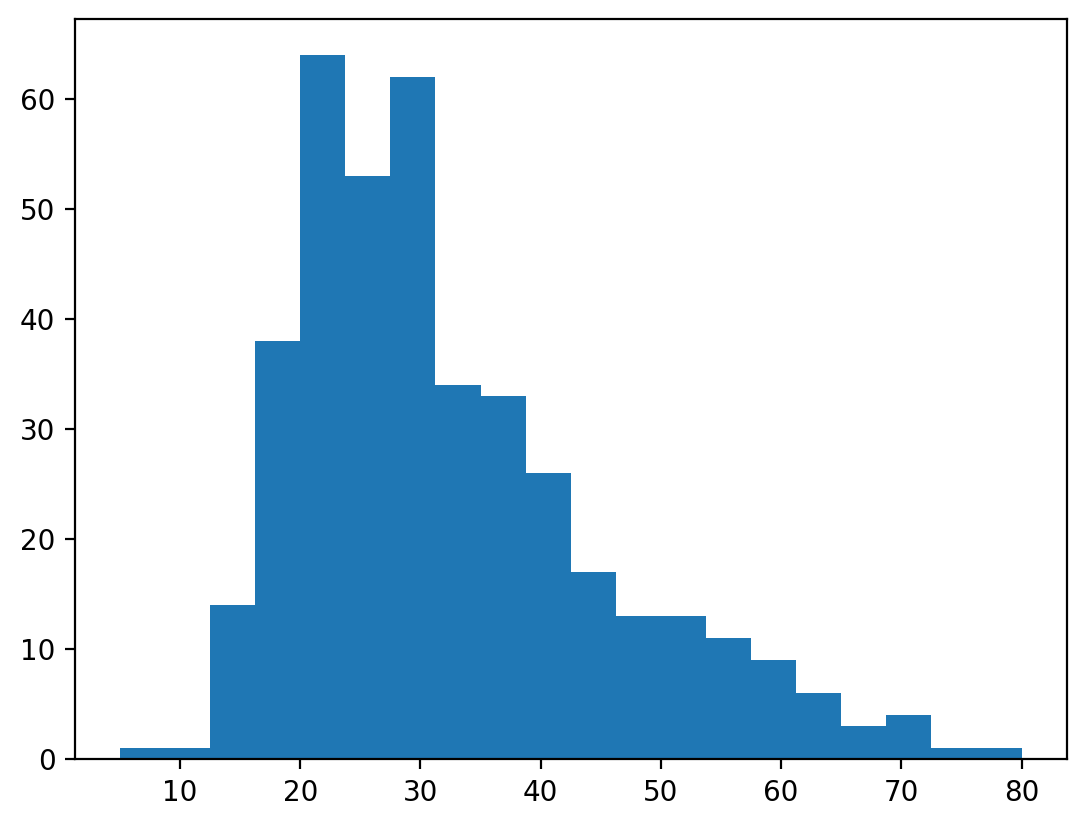

In [232]:
#SibSp, Parch 모두 0인 행 추출
data[(data.SibSp==0) & (data.Parch==0)]  #537행
plt.hist(data[(data.SibSp==0) & (data.Parch==0)]['Age'],bins=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


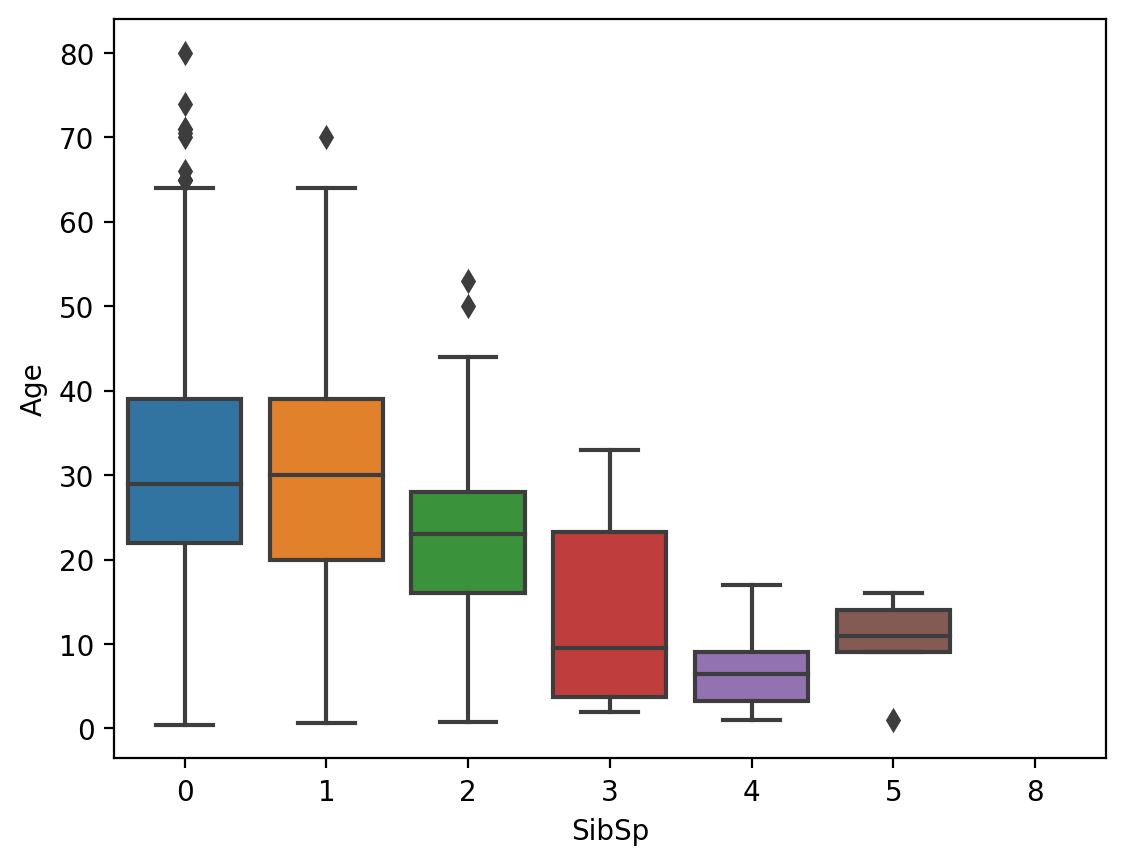

In [243]:
#나이와 SipSp
sns.boxplot(x='SibSp',y='Age',data=data)
data[data.SibSp>=5]

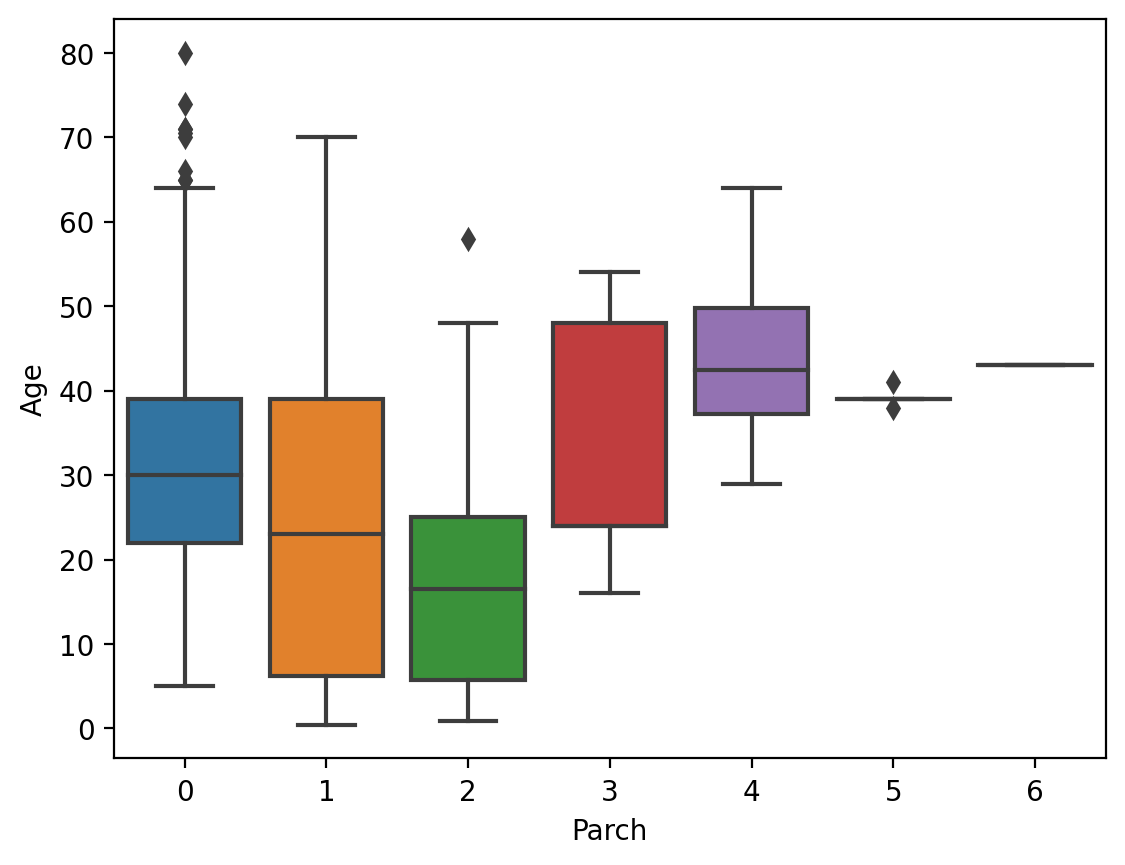

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S


In [248]:
#Age, Parch
sns.boxplot(x='Parch',y='Age',data=data)
plt.show()
#Parch 3 이상이면 나이가 많아짐 -> 많은 자식 수를 가진 부모로 추론 가능
data[data.Parch>=3]

# Ticket
- 알파벳과 숫자로 이루어진 티켓 / 숫자로만 이루어진 티켓 존재
- 숫자로만 이루어진 티켓은 맨 앞자리가 Pclass인 것으로 추정, 티켓에 자리에 대한 단서가 있을 수 있음

In [182]:
# Ticket
print('Ticket value counts : \n',data['Ticket'].value_counts())
print(data.Ticket.unique())

Ticket value counts : 
 1601        7
CA. 2343    7
347082      7
3101295     6
347088      6
           ..
28134       1
330932      1
226875      1
111320      1
248723      1
Name: Ticket, Length: 681, dtype: int64
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345

In [181]:
data[data.Ticket.str.contains('[a-zA-Z]')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [214]:
data[~data.Ticket.str.contains('[a-zA-Z]')]  #알파벳이 들어가지 않은 행 추출
# 맨 앞에 있는 숫자가 Pclass랑 같은 것을 확인해볼 수 있음, 즉 Ticket은 티켓클래스와 함께 해당 승객의 정보를 가지고 있는 변수일 수 있다
# pd.DataFrame([int(i[0]) for i in data[~data.Ticket.str.contains('[a-zA-Z]')].Ticket]).value_counts()  #맨 첫번째 숫자의 빈도 확인하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [204]:
data.Ticket.str.extract('([a-zA-Z]+)').value_counts()  #앞에 있는 알파벳만 출력하기

PC       60
C        33
A        29
STON     18
SOTON    17
S        14
CA       14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
Fa        1
SCO       1
SO        1
SW        1
dtype: int64

# Fare(요금)
- 연속형 변수로, 치우쳐져 있는 히스토그램
- 생존 집단이 사망 집단보다 생존확률이 약 2배 높음 -> 등석이 낮을수록 비싸기 때문으로 추정
- 나이와 요금 사이의 상관 계수 0.096으로 의미가 없어보임 -> 어린 승객이라도 부모와 함께 오며, 부모가 금액을 부담하기 때문으로 추정

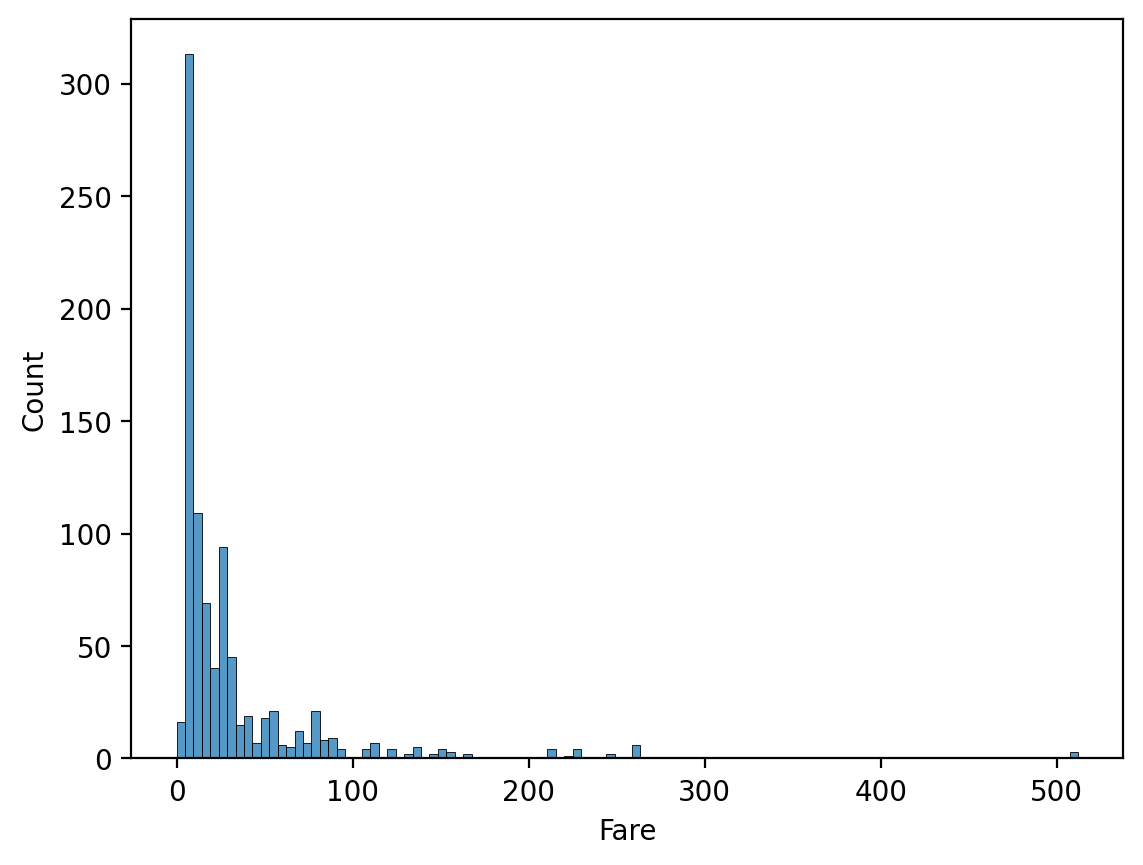

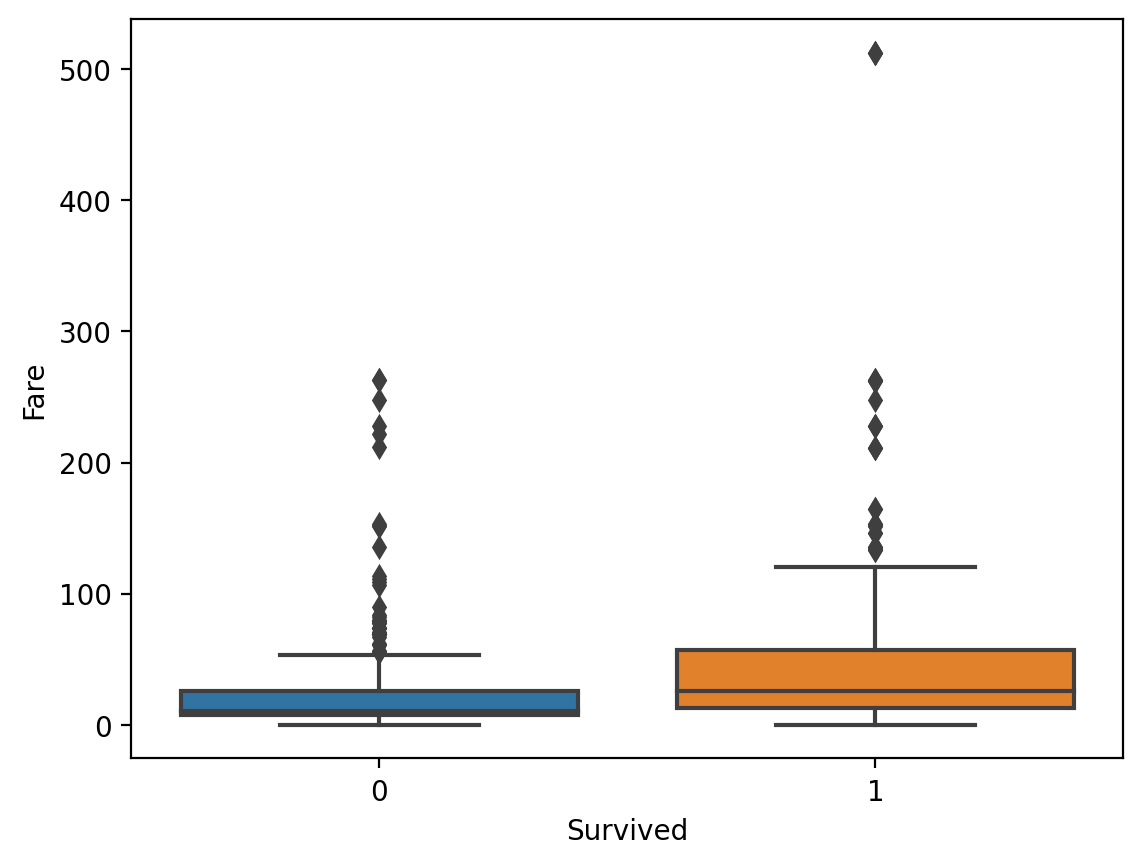

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [256]:
# Fare
sns.histplot(data.Fare)
plt.show()
#요금과 생존 여부 살펴보기
sns.boxplot(x='Survived',y='Fare',data=data)
plt.show()
data.groupby('Survived').mean().Fare

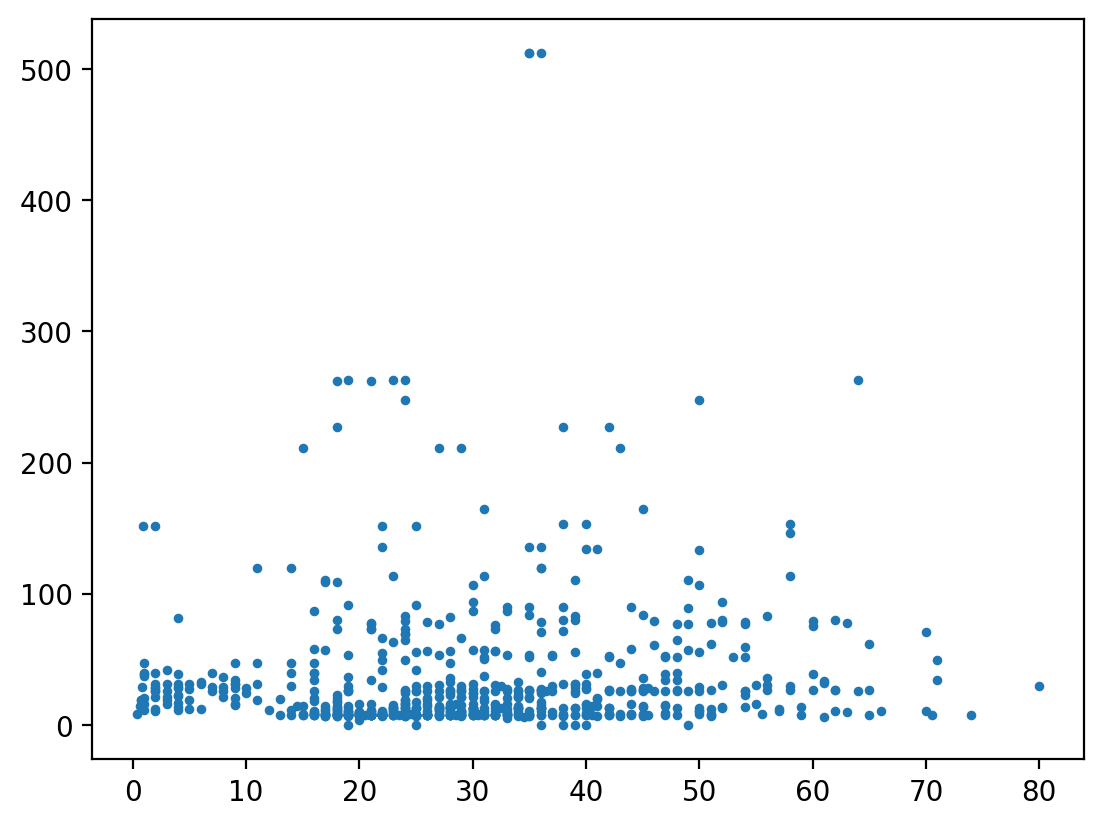

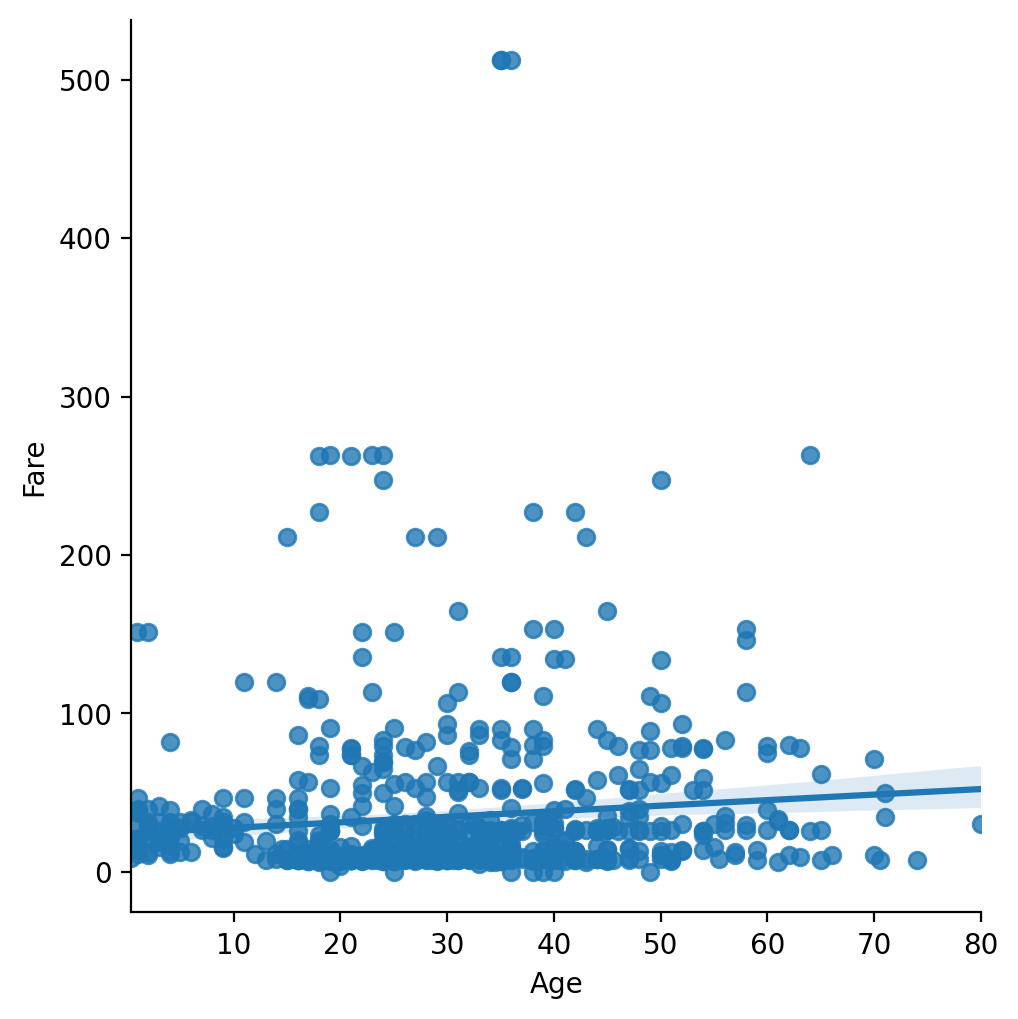

In [251]:
# 요금과 나이 관계 살펴보기
plt.scatter(data.Age, data.Fare, s=6)
plt.show()
sns.lmplot(x = 'Age', y = 'Fare', data = data)
plt.show()

# Cabin
- 많은 결측치
- 결측치를 채울 방법 생각해보기

In [266]:
pd.DataFrame([i[0] for i in data[data.Cabin.isna()==False].Cabin]).value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
dtype: int64

In [269]:
data[data.Cabin.isna()==False][:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


# Embarked
- C가 생존확률이 다른 항에 비해 더 높음

<AxesSubplot:xlabel='Embarked', ylabel='count'>

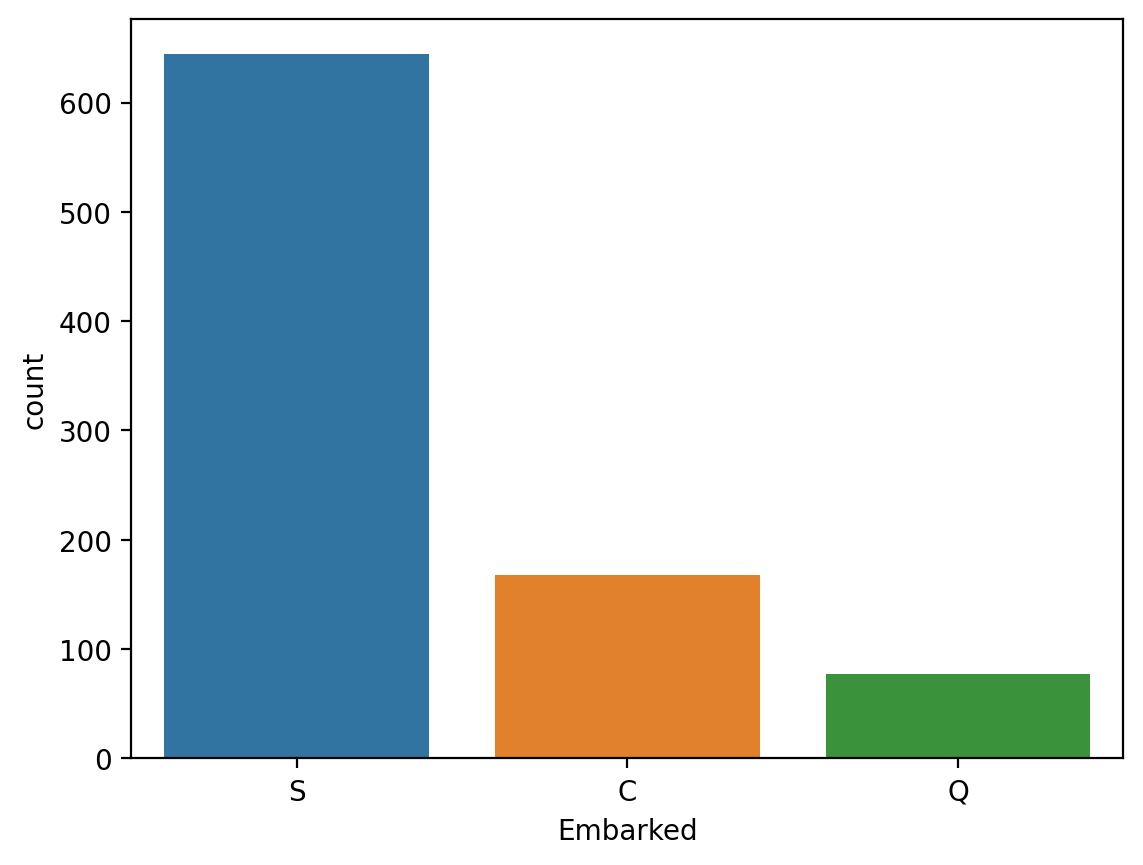

In [270]:
sns.countplot(x='Embarked',data=data)

In [271]:
data.groupby('Embarked').mean().Survived

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64